Primeras filas del dataset:
   record  mean_rr  std_rr  skew_rr  kurt_rr label
0  A00001   761.67   61.30     1.06     7.72     N
1  A00002   819.44  258.53    -0.74    -1.11     N
2  A00003   916.26  452.40     2.26     7.25     N
3  A00004   936.04  178.68     0.57    -0.86     A
4  A00005   537.45  217.84     1.23     0.21     A

Descripción estadística:
            mean_rr        std_rr      skew_rr      kurt_rr
count   5774.000000   5774.000000  5765.000000  5765.000000
mean     959.936512    355.333121    -0.305242     4.281901
std      690.832326    850.848868     1.942746     7.214603
min      313.330000      0.000000    -7.430000    -2.000000
25%      723.905000     70.797500    -1.450000    -0.300000
50%      823.240000    146.715000    -0.030000     1.550000
75%      939.140000    256.820000     0.920000     6.040000
max    16644.440000  12456.080000     7.820000    78.170000

Tipos de datos:
record      object
mean_rr    float64
std_rr     float64
skew_rr    float64
kurt_rr

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


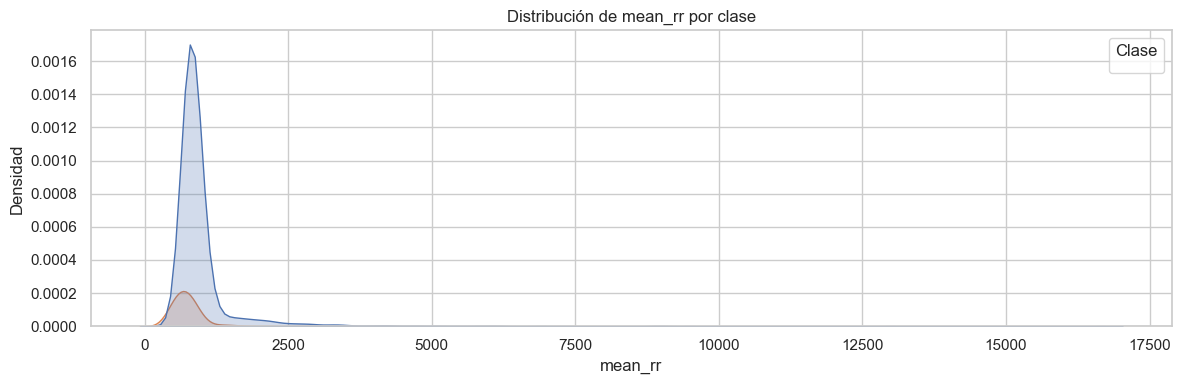

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


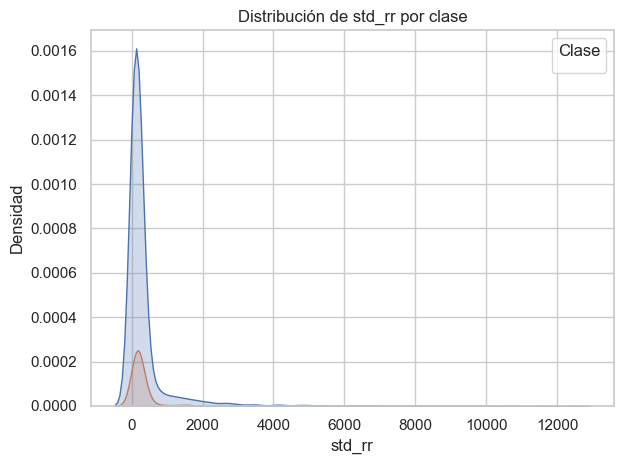

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


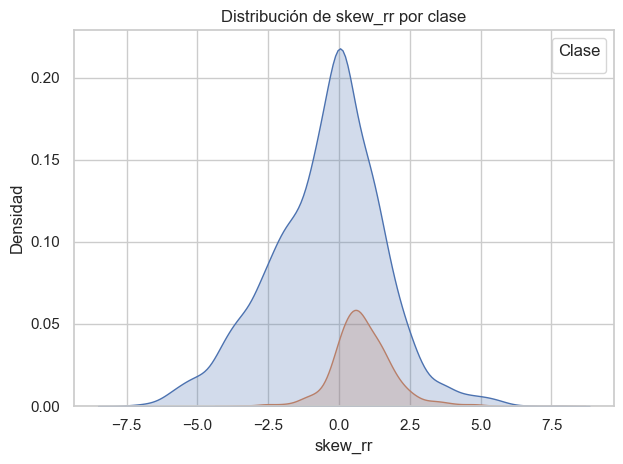

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


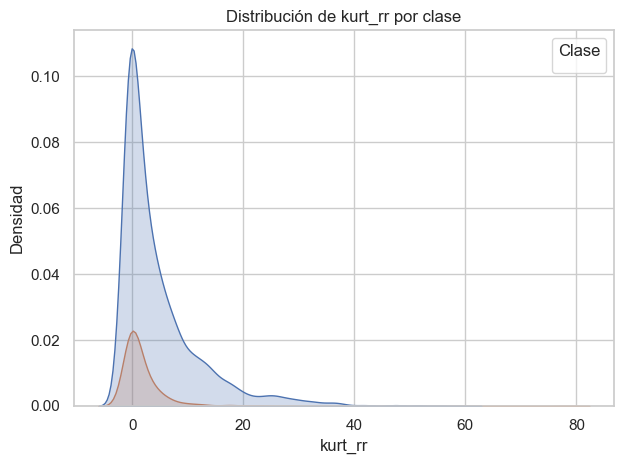

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


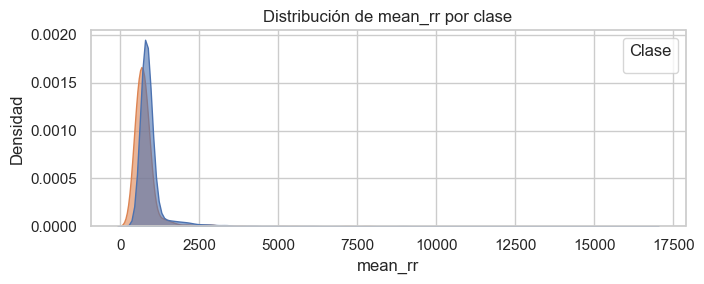

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


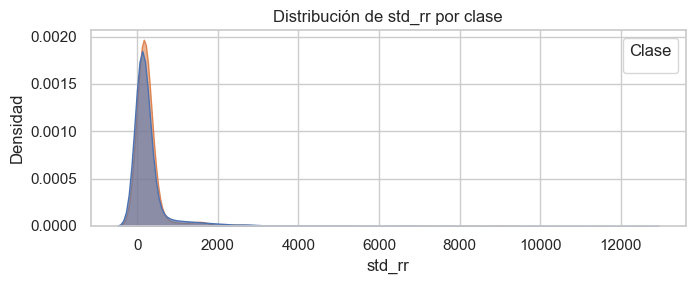

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


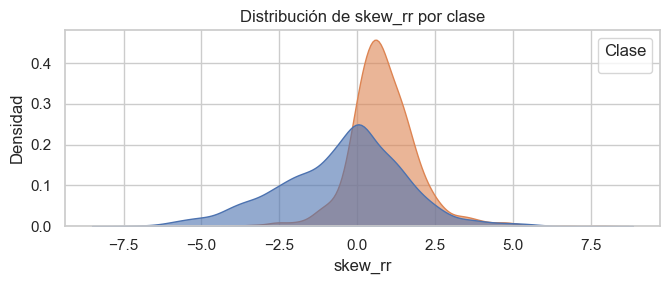

C:\Users\diego\AppData\Local\Temp\ipykernel_16928\3588190422.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


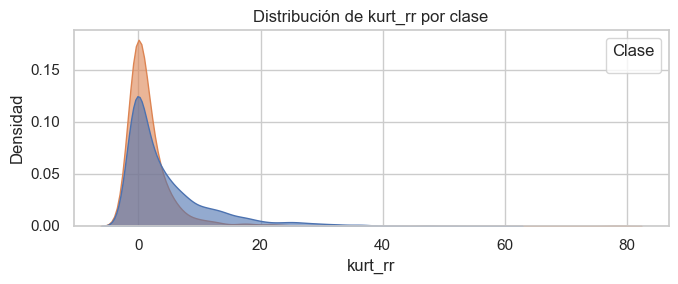

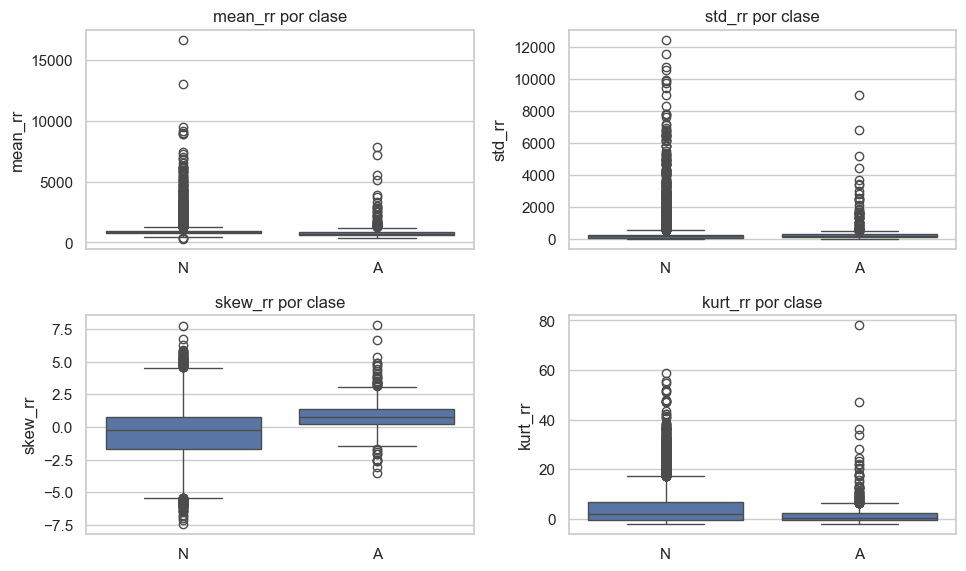


Comparación entre clases (N vs A):
mean_rr: t = 8.22, p = 0.0000 Diferencia
std_rr: t = 2.26, p = 0.0243 Diferencia
skew_rr: t = nan, p = nan No significativa
kurt_rr: t = nan, p = nan No significativa

Observaciones iniciales:

- mean_rr y std_rr suelen ser claramente más bajos o variables en AFib.
- skew/kurtosis pueden ayudar pero no son tan marcadamente distintos.
- El test t muestra qué variables ayudan a distinguir N vs A.
- Ideal para entrenar un clasificador binario (ej. Logistic Regression).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Cargar CSV
df = pd.read_csv('ecg_rr_features_curado.csv')

# Inspección inicial del dataset
print("Primeras filas del dataset:")
print(df.head())

print("\nDescripción estadística:")
print(df.describe())

print("\nTipos de datos:")
print(df.dtypes)

# Clases presentes
print("\nDistribución de clases:")
print(df['label'].value_counts())

# Filtrar clases relevantes (Normal vs AFib)
df_af = df[df['label'] == 'A']
df_n  = df[df['label'] == 'N']
df_filtered = df[df['label'].isin(['A', 'N'])]

# Visualización: distribución de RR por clase
sns.set(style="whitegrid")

plt.figure(figsize=(12, 4))
for col in ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']:
    sns.kdeplot(data=df_filtered, x=col, hue='label', fill=True)
    plt.title(f'Distribución de {col} por clase')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Clase')
    plt.tight_layout()
    plt.show()

# KDE plots: Distribuciones por clase
sns.set(style="whitegrid")
features = ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']

for col in features:
    plt.figure(figsize=(7, 3))  # más angosto
    sns.kdeplot(data=df_filtered, x=col, hue='label', fill=True, common_norm=False, alpha=0.6)
    plt.title(f'Distribución de {col} por clase')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Clase')
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.95)
    plt.show()

# Boxplots en una grilla 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df_filtered, x='label', y=col, ax=axes[i])
    axes[i].set_title(f'{col} por clase')
    axes[i].set_xlabel('')

plt.tight_layout(pad=1.2)
plt.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.08)
plt.show()

# T-TEST entre clases (Normal vs AFib) 
print("\nComparación entre clases (N vs A):")
for col in ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']:
    t_stat, p_val = ttest_ind(df_n[col], df_af[col], equal_var=False)
    print(f"{col}: t = {t_stat:.2f}, p = {p_val:.4f} {'Diferencia' if p_val < 0.05 else 'No significativa'}")

# Comentario general
print("\nObservaciones iniciales:")
print("""
- mean_rr y std_rr suelen ser claramente más bajos o variables en AFib.
- skew/kurtosis pueden ayudar pero no son tan marcadamente distintos.
- El test t muestra qué variables ayudan a distinguir N vs A.
- Ideal para entrenar un clasificador binario (ej. Logistic Regression).
""")